<a href="https://colab.research.google.com/github/pyratlib/pyrat/blob/main/PyRAT_Behavior_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyRAT example

This notebook has examples of using the library to perform behavior classification. The data is stored on Zenodo (https://zenodo.org/record/5864324). Here we used a mice video from Sturman et al., 2020; and their publication can be found in https://www.nature.com/articles/s41386-020-0776-y#Sec29. 

Behavior Classification:
1.   [In rats](#rats)
2.   [In mice](#mice)


For more details: https://github.com/pyratlib/pyrat

In [1]:
#@title Installing PyRAT and downloading data.
!pip install pyratlib
!pip install wget
!pip install unrar
!git clone 
!wget https://zenodo.org/record/5865893/files/PyRAT_dataset.rar?download=1
!unrar x "/content/PyRAT_dataset.rar?download=1"

import pyratlib as rat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from IPython.display import clear_output 

clear_output()

## Behavior Classification

## In rats <a name="rats"></a>

Load the data from the DLC and filter according to the probability of getting it right.

In [2]:
data = pd.read_csv('/content/PyRAT_dataset/t-SNE.csv')

df = data.loc[np.where(data.iloc[:,([3,6, 9, 21])].values[2:].astype(np.float).mean(axis=1) > 0.6)]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


    """
    Returns an array with the cluster by frame, an array with the embedding data in low-dimensional 
    space and the clusterization model.
    
    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    video : str
        Video directory
    bodyparts_list : list
        List with name of body parts.
    dimensions : int
        Dimension of the embedded space.
    distance : int
        The linkage distance threshold above which, clusters will not be merged.
    startIndex : int, optional
        Initial index.
    endIndex : int, optional
        Last index.
    n_jobs : int, optional
        The number of parallel jobs to run for neighbors search.
    verbose : int, optional
        Verbosity level.
    perplexity : float, optional
        The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity.
    learning_rate : float, optional
        t-SNE learning rate.
    directory : str, optional
        Path where frame images will be saved.
    return_metrics : bool, optional
         Where True, returns t-SNE metrics, otherwise does not return t-SNE metrics.
    knn_n_neighbors : int, optional
        Number of neighbors to use by default for kneighbors queries in KNN metric.
    knc_n_neighbors : int, optional
        Number of neighbors to use by default for kneighbors queries in KNC metric.
    n : int, optional
        Number of N randomly chosen points in CPD metric.
    Returns
    -------
    cluster_labels : array
        Array with the cluster by frame.
    X_transformed : array
        Embedding of the training data in low-dimensional space.
    model : Obj
        AgglomerativeClustering model.
    d  : array
        High dimension data.
    knn : int, optional
        The fraction of k-nearest neighbours in the original highdimensional data that are preserved as k-nearest neighbours in the embedding.
    knc : int, optional
        The fraction of k-nearest class means in the original data that are preserved as k-nearest class means in the embedding. This is computed for class means only and averaged across all classes.
    cpd : Obj, optional
        Spearman correlation between pairwise distances in the high-dimensional space and in the embedding.
    
    See Also
    --------
    For more information and usage examples: https://github.com/pyratlib/pyrat
    
    Notes
    -----
    This function was developed based on DLC outputs and is able to support 
    matplotlib configurations."""
  

/usr/local/lib/python3.7/dist-packages/pyratlib/processing.py:1562: RuntimeWarning: invalid value encountered in true_divide
  distances2[:, i, j] = distances2[:, i, j]/np.max(distances2[:, i, j])
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


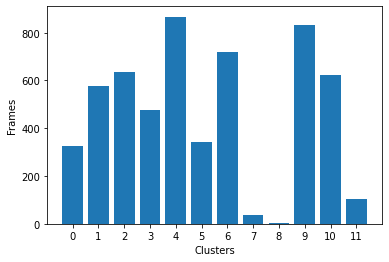

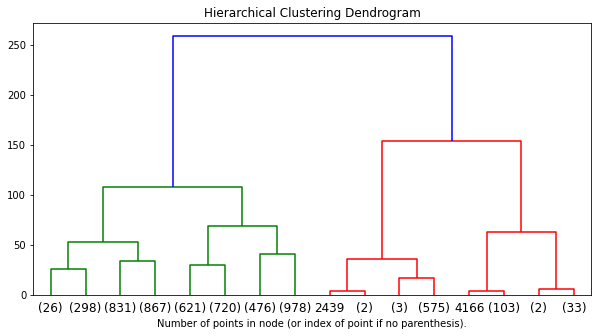

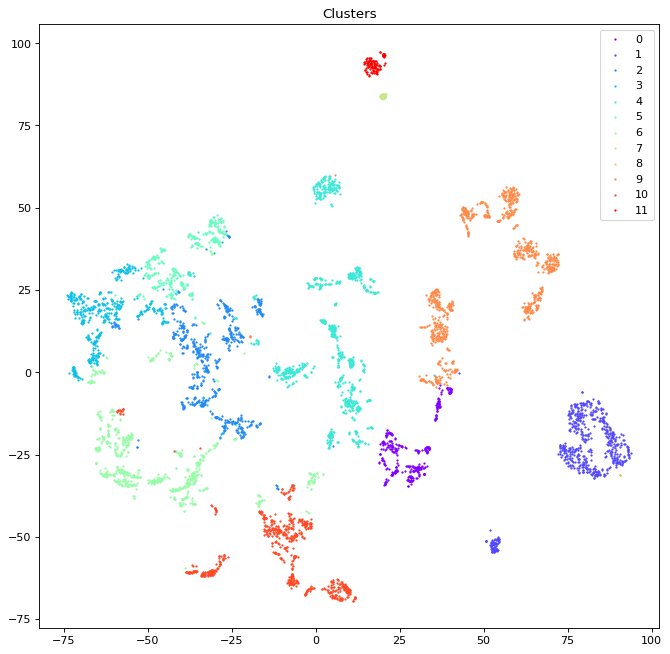

In [3]:
cluster_labels, data_emb, model, data_high = rat.ClassifyBehavior(df,
                                                                   video ='/content/PyRAT_dataset/R10D1_VIDEO2TSNE.AVI',
                                                                   bodyparts_list=["nose", "earR", "earL", "tailBase"],
                                                                   n_components = 2, 
                                                                   distance = 28, 
                                                                   startIndex=27000,
                                                                   directory = "/content/images_rat")

## In mice <a name="mice"></a>

In [4]:
data = pd.read_csv('/content/PyRAT_dataset/OFT_5_zoom.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python3.7/dist-packages/pyratlib/processing.py:1562: RuntimeWarning: invalid value encountered in true_divide
  distances2[:, i, j] = distances2[:, i, j]/np.max(distances2[:, i, j])
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


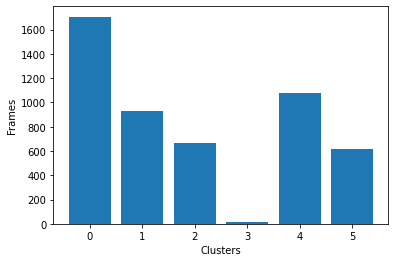

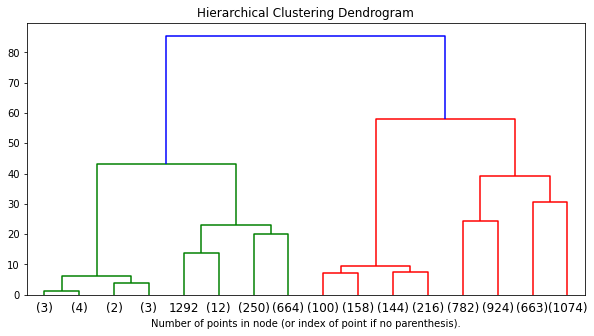

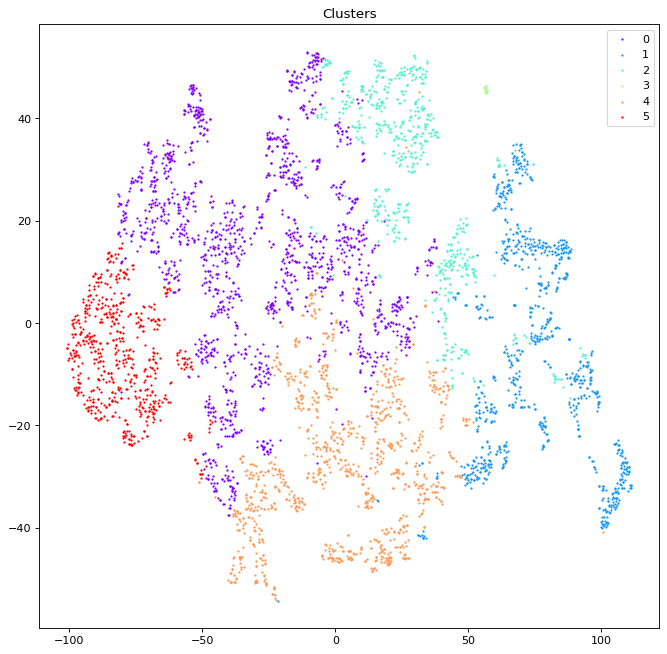

In [5]:
cluster_labels,  data_emb, model, data_high = rat.ClassifyBehavior(data,
                                                                  video ='/content/PyRAT_dataset/R10D1_VIDEO2TSNE.AVI',
                                                                  bodyparts_list=["nose","r_ear", "l_ear", "tail_base"], 
                                                                  n_components = 2, 
                                                                  distance = 28, 
                                                                  startIndex=5000, 
                                                                  endIndex = 10000, 
                                                                  directory = "/content/images_mice")